In [3]:
import pickle
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from simulator.data_structures import *
from simulator.simulator import Simulator, load_md_from_file
from strategies.get_pnl import get_pnl_df, visualize_pnl
from strategies.baseline import BaselineStrategy

plt.style.use('ggplot')
sns.set(font_scale=1.5)

In [4]:
%%time

ready_md = load_md_from_file("md/btcusdt:Binance:LinearPerpetual", remove_outliers=True)

Data loaded successfully


Lobs market data generating: 100%|█| 2541356/2541356 [01:47<00:00, 23660.07it/s]
Trades market data generating: 100%|█| 5727708/5727708 [02:54<00:00, 32893.85it/


Sorting
CPU times: user 2min 50s, sys: 1min 59s, total: 4min 49s
Wall time: 5min 55s


In [5]:
with open('data/market_data.pickle', 'wb') as f:
    pickle.dump(ready_md, f)

In [3]:
# %%time

# with open('data/market_data.pickle', 'rb') as f:
#     ready_md = pickle.load(f)

CPU times: user 51.3 s, sys: 1min 13s, total: 2min 4s
Wall time: 2min 53s


# Baseline Strategy: quoting on the best level

## Running Strategy

In [6]:
sim = Simulator("md/btcusdt:Binance:LinearPerpetual", 3, 3, ready_md=ready_md)
baseline_strategy = BaselineStrategy(max_position=1, maker_fee=0, time_to_cancel=50, trade_size=0.001)

In [7]:
%%time

history, completed_trades = baseline_strategy.run(sim)

Current time: 2022-06-23 00:10:02.251570263
Coin Position: -0.3650000000000003
Money Position: 7328.554199999759

Current time: 2022-06-23 00:20:02.270048319
Coin Position: -0.38600000000000034
Money Position: 7726.507399999952

Current time: 2022-06-23 00:30:02.275325530
Coin Position: -0.4570000000000004
Money Position: 9122.394660000382

Current time: 2022-06-23 00:40:02.276875154
Coin Position: 0.6770000000000005
Money Position: -13842.98273999966

Current time: 2022-06-23 00:50:02.282619947
Coin Position: 0.13
Money Position: -2750.847539999609

Current time: 2022-06-23 01:00:02.288086
Coin Position: -0.48800000000000043
Money Position: 9819.72496000031

Current time: 2022-06-23 01:10:02.306757641
Coin Position: -0.26800000000000024
Money Position: 5328.535660000366

Current time: 2022-06-23 01:20:02.318069189
Coin Position: 0.5330000000000004
Money Position: -10960.111839999525

Current time: 2022-06-23 01:30:02.330147867
Coin Position: -0.7990000000000007
Money Position: 16301.6

Current time: 2022-06-23 12:10:03.723962410
Coin Position: 0.5580000000000004
Money Position: -12073.95925000046

Current time: 2022-06-23 12:20:03.747740985
Coin Position: -0.4400000000000004
Money Position: 8548.759549999599

Current time: 2022-06-23 12:30:03.753808013
Coin Position: -0.8920000000000008
Money Position: 17885.126249999466

Current time: 2022-06-23 12:40:03.772022140
Coin Position: 0.9400000000000006
Money Position: -20277.005550000373

Current time: 2022-06-23 12:50:03.792865216
Coin Position: 0.9210000000000006
Money Position: -19894.875150000193

Current time: 2022-06-23 13:00:03.817108619
Coin Position: 0.3880000000000001
Money Position: -8961.060849999347

Current time: 2022-06-23 13:10:03.825725965
Coin Position: -0.041000000000000245
Money Position: -115.75134999932355

Current time: 2022-06-23 13:20:03.832755527
Coin Position: 0.5670000000000003
Money Position: -12633.102349999248

Current time: 2022-06-23 13:30:03.840372791
Coin Position: 0.9360000000000006
Mo

## Results Visualization

In [8]:
# df = get_pnl_df(history)
# df.set_index('time', inplace=True)
# df.index = pd.to_datetime(df.index)
# df.to_csv('data/pnl_df.csv')

df = pd.read_csv('data/pnl_df.csv', index_col='time')
df.index = pd.to_datetime(df.index)

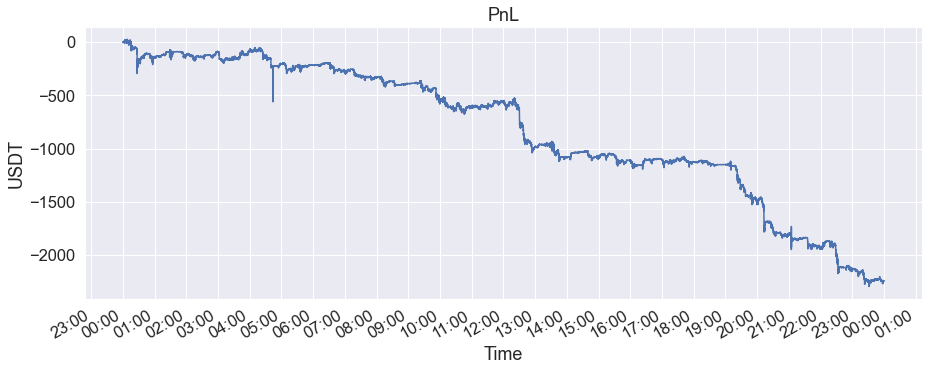

In [35]:
visualize_pnl(df, freq=25)